In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
import matplotlib 
font = {'size'   : 22}

matplotlib.rc('font', **font)

In [3]:
df = pd.read_csv('results.csv')
df.head()

,Unnamed: 0,cuda_render,cuda_render_big_scene,cpu_render_scene,cpu_render_scene_big_scene,cpu_render_scene_parallel,cpu_render_scene_parallel_big_scene
0,0,0.003564,0.309371,0.004963,0.157652,0.003904,0.124125
1,1,0.006609,0.349789,0.020882,0.655979,0.007140,0.194397
2,2,0.008274,0.438153,0.085913,2.711431,0.028584,0.561307
3,3,0.017561,0.581532,0.349216,10.983420,0.101942,1.970120
4,4,0.028290,1.384328,1.402956,44.614897,0.414703,7.799665


In [4]:
df.multiply(1000).round(3).to_csv('rounded_results.csv')

In [5]:
df = pd.read_csv('rounded_results.csv')
df = df.replace(0, np.NaN)
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
columns = df.columns
df.head()

,cuda_render,cuda_render_big_scene,cpu_render_scene,cpu_render_scene_big_scene,cpu_render_scene_parallel,cpu_render_scene_parallel_big_scene
0,3.564,309.371,4.963,157.652,3.904,124.125
1,6.609,349.789,20.882,655.979,7.140,194.397
2,8.274,438.153,85.913,2711.431,28.584,561.307
3,17.561,581.532,349.216,10983.420,101.942,1970.120
4,28.290,1384.328,1402.956,44614.897,414.703,7799.665


In [6]:
name2beauty_name = {
    'cuda_render': 'GPU',
    'cuda_render_big_scene': 'GPU big scene',
    
    'cpu_render_scene': 'CPU',
    'cpu_render_scene_big_scene': 'CPU big scene',
    
    'cpu_render_scene_parallel': 'CPU parallel',
    'cpu_render_scene_parallel_big_scene': 'CPU parallel big scene',
}

In [7]:
array_size = [i for i in range(3, 8)]

In [8]:
array_size

[3, 4, 5, 6, 7]

In [9]:
data = df.values
data

array([[3.5640000e+00, 3.0937100e+02, 4.9630000e+00, 1.5765200e+02,
        3.9040000e+00, 1.2412500e+02],
       [6.6090000e+00, 3.4978900e+02, 2.0882000e+01, 6.5597900e+02,
        7.1400000e+00, 1.9439700e+02],
       [8.2740000e+00, 4.3815300e+02, 8.5913000e+01, 2.7114310e+03,
        2.8584000e+01, 5.6130700e+02],
       [1.7561000e+01, 5.8153200e+02, 3.4921600e+02, 1.0983420e+04,
        1.0194200e+02, 1.9701200e+03],
       [2.8290000e+01, 1.3843280e+03, 1.4029560e+03, 4.4614897e+04,
        4.1470300e+02, 7.7996650e+03]])

In [10]:
data[::, 1]

array([ 309.371,  349.789,  438.153,  581.532, 1384.328])

In [11]:
def draw_plot(iterator, title):
    fig = plt.figure(figsize=(12, 12))
    for i in iterator:
        plt.plot(data[::, i], '-o', label=name2beauty_name[columns[i]])
    plt.title(title)
    plt.xlabel("Vector length power of 2")
    plt.ylabel("Time (ms.)")
    plt.xticks(np.arange(0, len(array_size)), array_size)

    plt.grid()
    plt.legend()
    
    fig.savefig(os.path.join('images', title.replace(' ', '') + '.svg'))

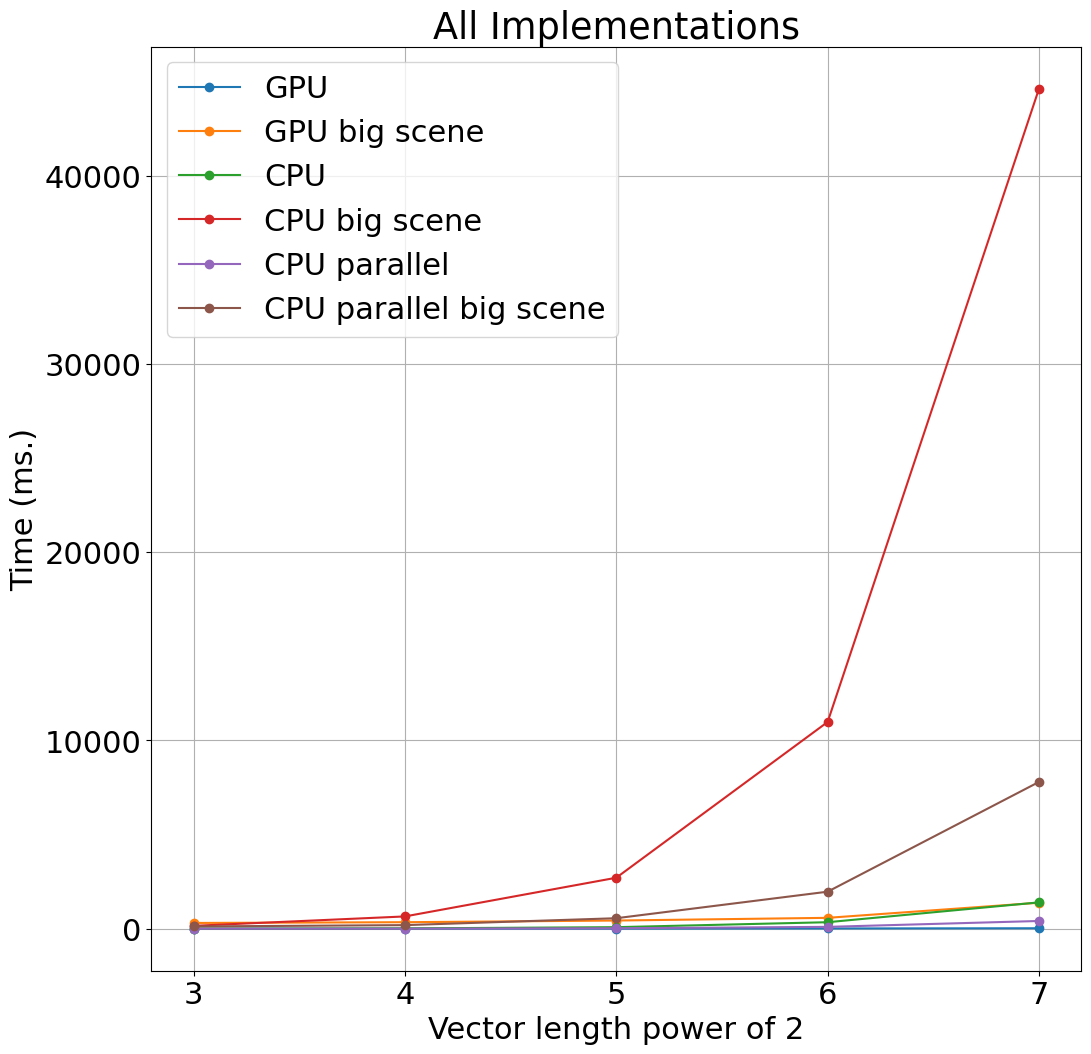

In [12]:
draw_plot(range(data.shape[1]), "All Implementations")

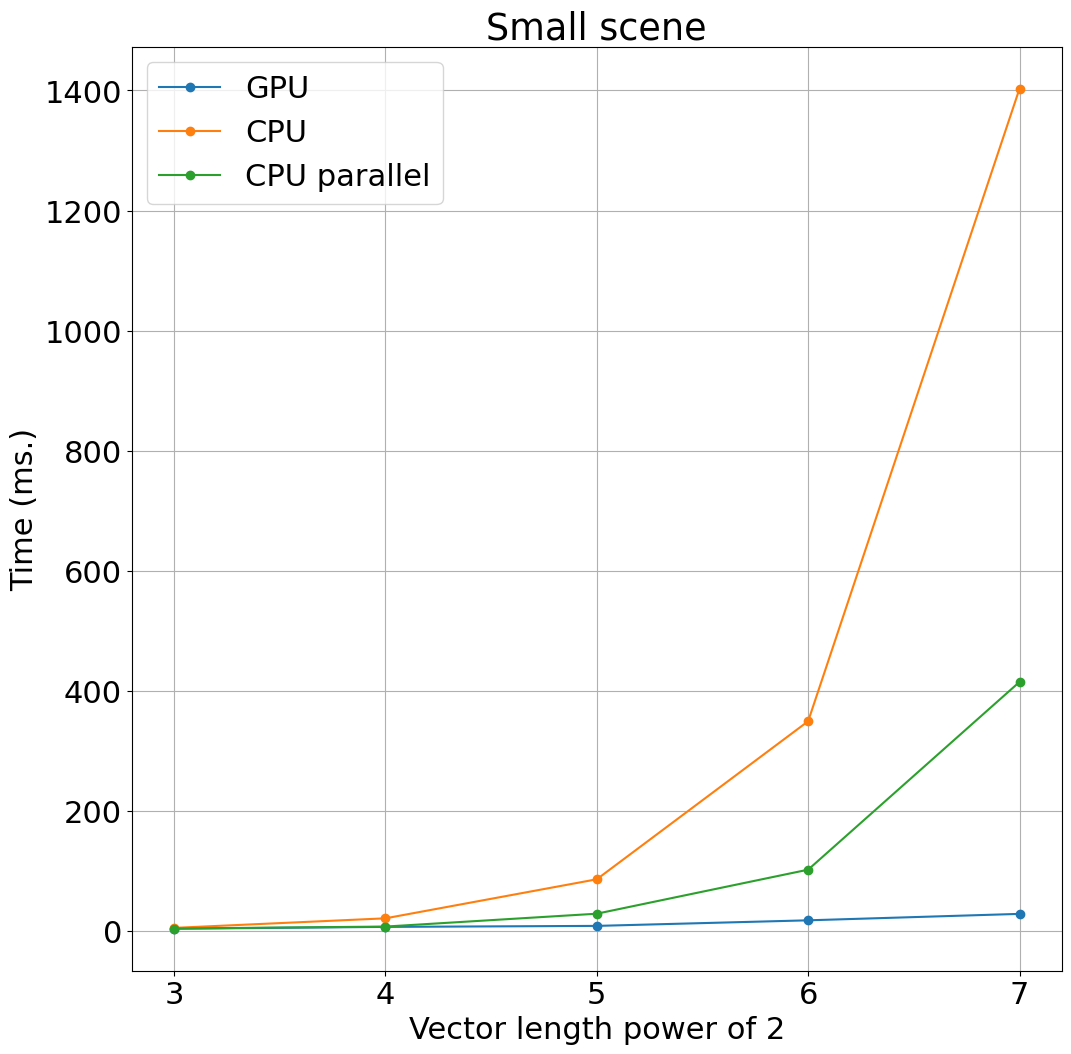

In [13]:
draw_plot([0, 2, 4], "Small scene")

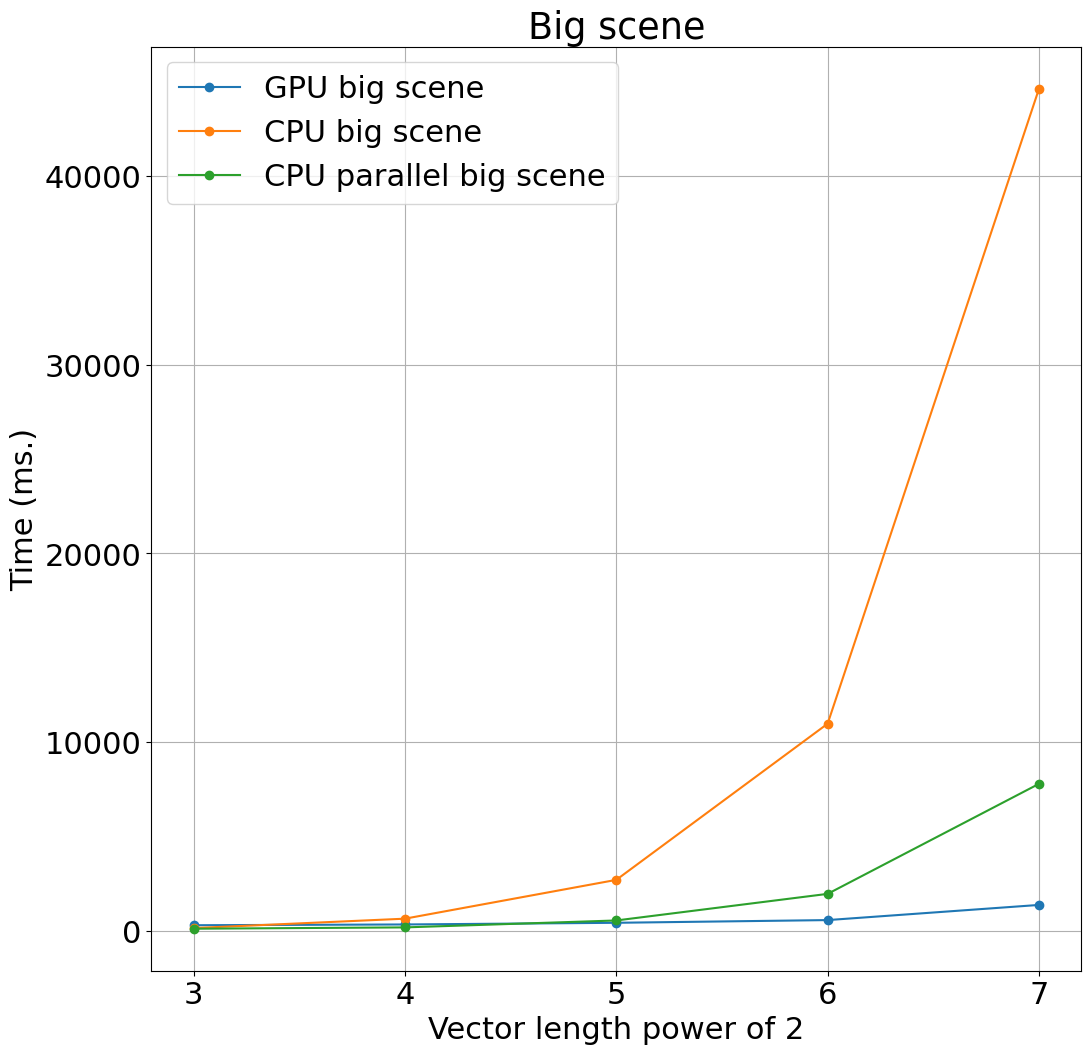

In [14]:
draw_plot([1, 3, 5], "Big scene")

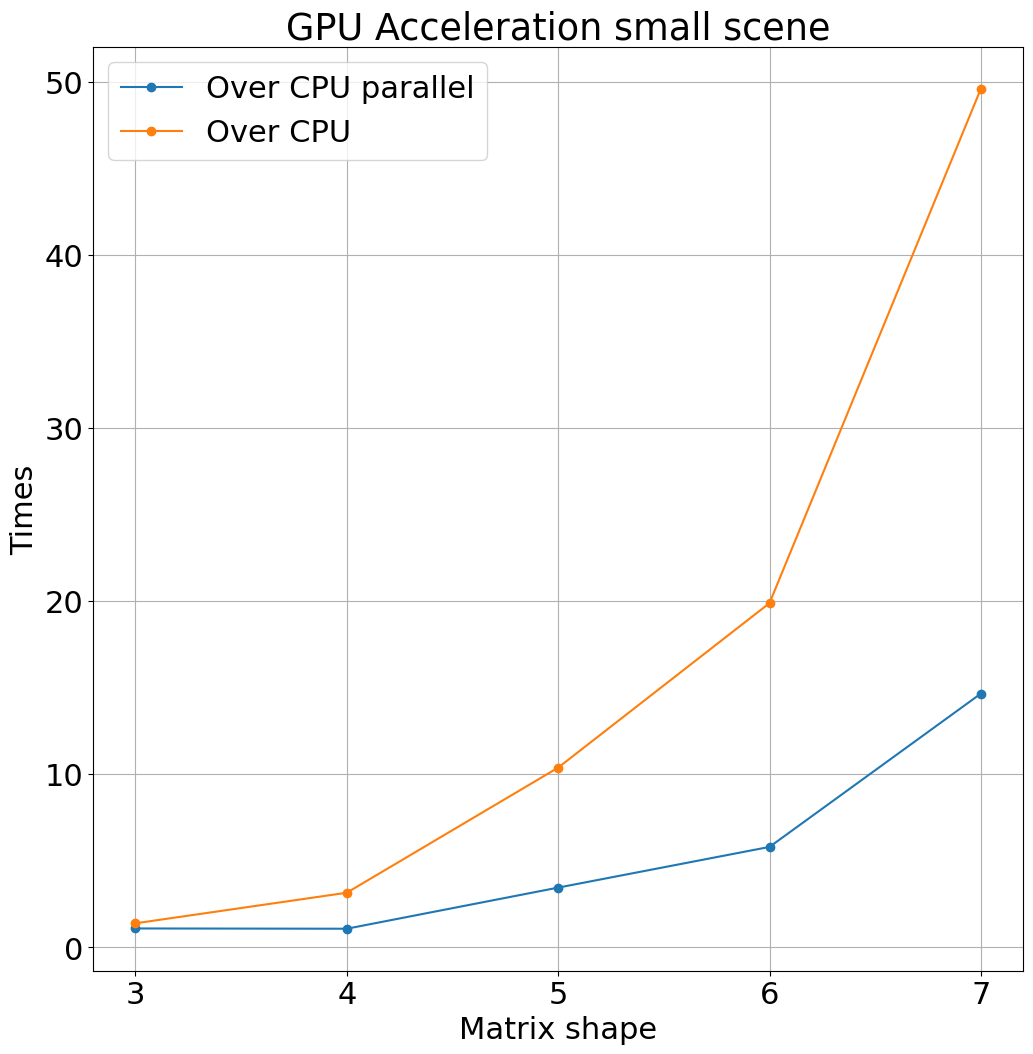

In [22]:
title = "GPU Acceleration small scene"
fig = plt.figure(figsize=(12, 12))

plt.plot(np.arange(0, len(array_size)), data[::, 4] / data[::, 0], '-o')
plt.plot(np.arange(0, len(array_size)), data[::, 2] / data[::, 0], '-o')
    
plt.title(title)
plt.xlabel("Matrix shape")
plt.ylabel("Times")
plt.xticks(np.arange(0, len(array_size)), array_size)
plt.grid()

plt.legend(['Over CPU parallel', 'Over CPU'])

fig.savefig(os.path.join('images', title.replace(' ', '') + '.svg'))

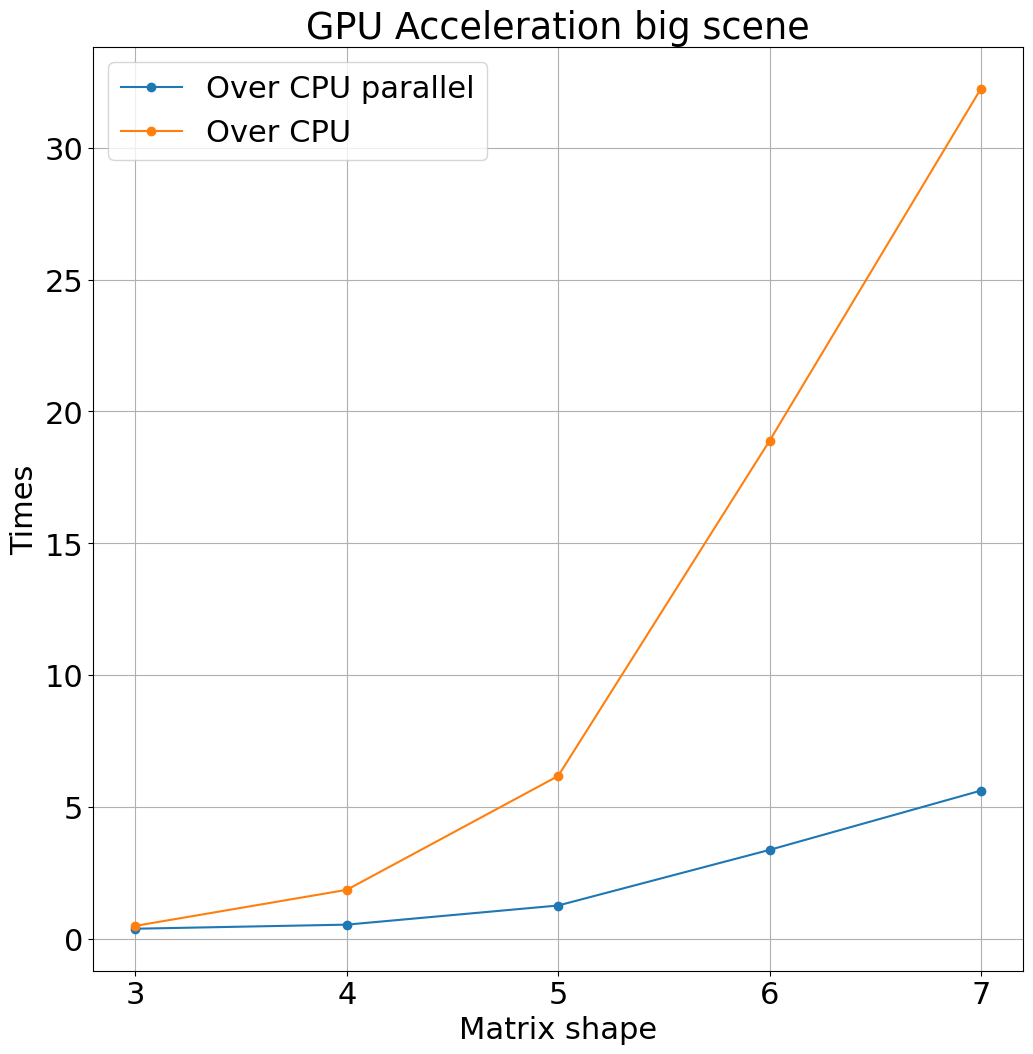

In [23]:
title = "GPU Acceleration big scene"
fig = plt.figure(figsize=(12, 12))

plt.plot(np.arange(0, len(array_size)), data[::, 5] / data[::, 1], '-o')
plt.plot(np.arange(0, len(array_size)), data[::, 3] / data[::, 1], '-o')
    
plt.title(title)
plt.xlabel("Matrix shape")
plt.ylabel("Times")
plt.xticks(np.arange(0, len(array_size)), array_size)
plt.grid()

plt.legend(['Over CPU parallel', 'Over CPU'])

fig.savefig(os.path.join('images', title.replace(' ', '') + '.svg'))